In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df=pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Desktop\\loan_data.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
categorical_feats=['purpose']

In [7]:
final_data =pd.get_dummies(df,columns=categorical_feats,drop_first=True)

In [8]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### DecisionTree using libraries

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier()


In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
# Measure training time
start_time = time.time()
dtree.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
start_time = time.time()
predict = dtree.predict(X_test)
prediction_time = time.time() - start_time

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict))
print(f"\nTraining Time: {training_time:.4f} seconds")
print(f"Prediction Time per sample: {prediction_time / len(X_test):.6f} seconds")

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874


Training Time: 0.0829 seconds
Prediction Time per sample: 0.000001 seconds


In [15]:
print(confusion_matrix(y_test,predict))

[[1988  443]
 [ 333  110]]


#### Random forest 

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
start_time = time.time()
rfc.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
start_time = time.time()
predict = rfc.predict(X_test)
prediction_time = time.time() - start_time

In [18]:
print(classification_report(y_test,predict))
print(f"\nTraining Time: {training_time:.4f} seconds")
print(f"Prediction Time per sample: {prediction_time / len(X_test):.6f} seconds")

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.32      0.01      0.03       443

    accuracy                           0.84      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874


Training Time: 1.5460 seconds
Prediction Time per sample: 0.000014 seconds


In [19]:
print(confusion_matrix(y_test,predict))

[[2418   13]
 [ 437    6]]


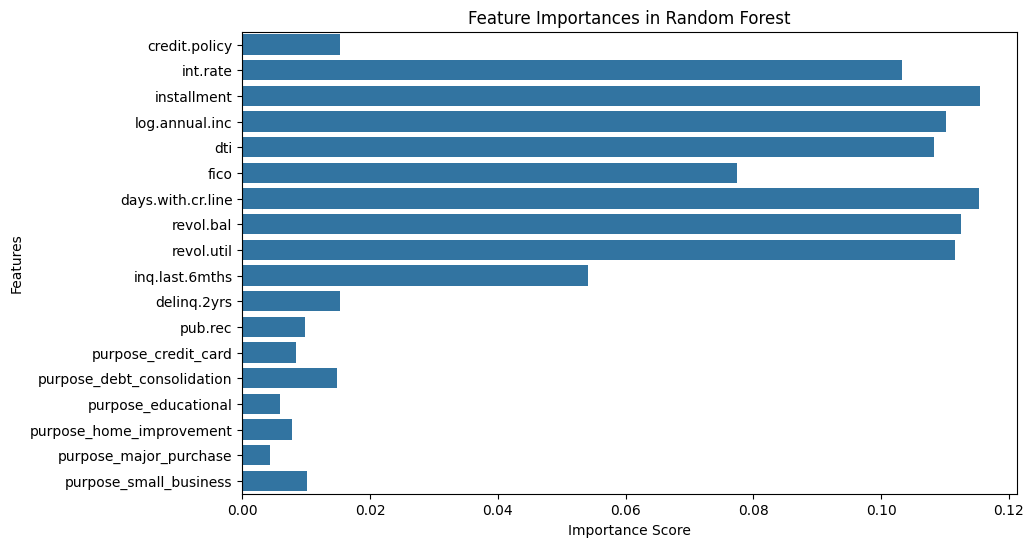

In [20]:
feature_importances = rfc.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

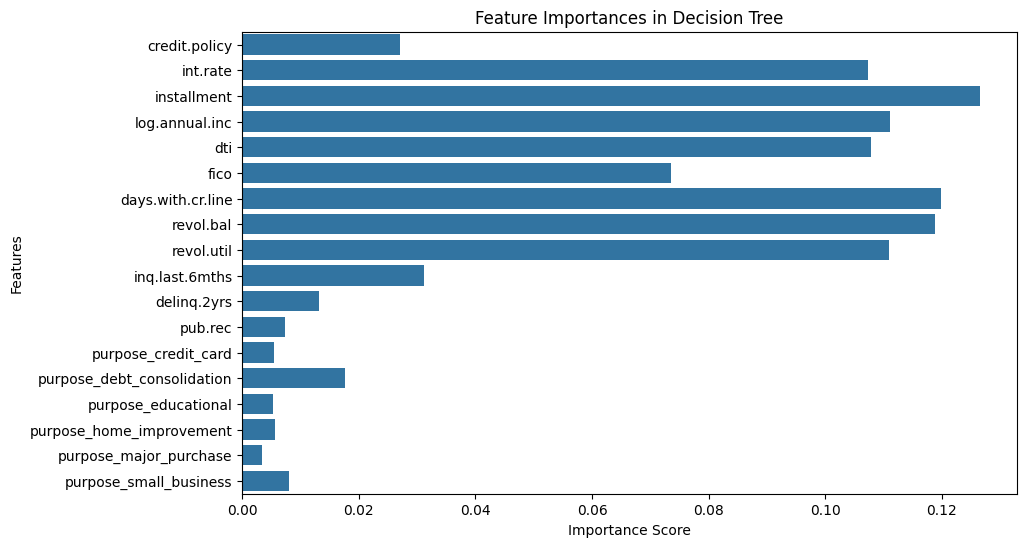

In [21]:
feature_importances_dt = dtree.feature_importances_
features = X.columns

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_dt, y=features)
plt.title("Feature Importances in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

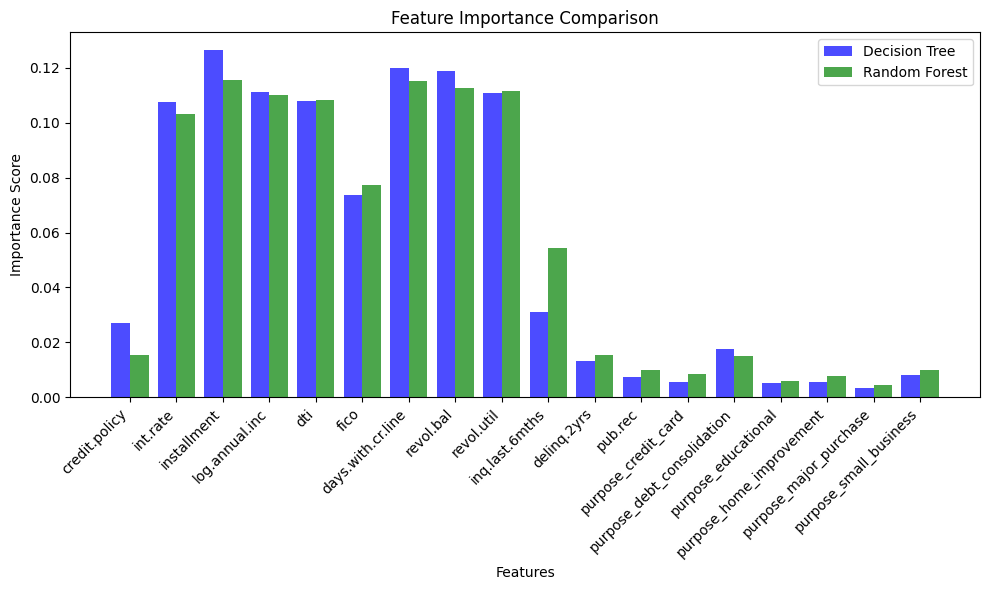

Time taken for feature importance extraction: 0.013627 seconds
Time taken for plotting: 0.301813 seconds


In [22]:
start_time = time.time()
dt_importances = dtree.feature_importances_
rf_importances = rfc.feature_importances_
feature_importance_time = time.time() - start_time

start_time = time.time()
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(X.columns))

plt.bar(index, dt_importances, bar_width, label="Decision Tree", alpha=0.7, color="blue")
plt.bar(index + bar_width, rf_importances, bar_width, label="Random Forest", alpha=0.7, color="green")
plt.xticks(index + bar_width / 2, X.columns, rotation=45, ha="right")
plt.title("Feature Importance Comparison")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.legend()
plt.tight_layout()
plt.show()

plotting_time = time.time() - start_time

print(f"Time taken for feature importance extraction: {feature_importance_time:.6f} seconds")
print(f"Time taken for plotting: {plotting_time:.6f} seconds")


### Decision tree using python function

In [23]:
def entropy(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(X_column, y, threshold):
    parent_entropy = entropy(y)
    
    left_indices = X_column <= threshold
    right_indices = X_column > threshold
    
    n = len(y)
    n_left, n_right = np.sum(left_indices), np.sum(right_indices)
    
    if n_left == 0 or n_right == 0:
        return 0
    
    e_left, e_right = entropy(y[left_indices]), entropy(y[right_indices])
    child_entropy = (n_left / n) * e_left + (n_right / n) * e_right
    
    return parent_entropy - child_entropy
def best_split(X, y):
    best_gain = -1
    best_feature = None
    best_threshold = None
    
    for feature_index in range(X.shape[1]):
        X_column = X[:, feature_index]
        thresholds = np.unique(X_column)
        
        for threshold in thresholds:
            gain = information_gain(X_column, y, threshold)
            
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold
    
    return best_feature, best_threshold

# Node class for the tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Decision tree class
class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.root = None
    
    def fit(self, X, y):
        self.root = self._grow_tree(X, y)
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)
        
        if len(unique_classes) == 1 or depth >= self.max_depth:
            most_common_class = unique_classes[np.argmax([np.sum(y == c) for c in unique_classes])]
            return Node(value=most_common_class)
        
        feature, threshold = best_split(X, y)
        
        if feature is None:
            most_common_class = unique_classes[np.argmax([np.sum(y == c) for c in unique_classes])]
            return Node(value=most_common_class)
        
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        
        return Node(feature, threshold, left_child, right_child)
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

final_data = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Desktop\\loan_data.csv")  # Load your dataset
X = final_data.drop('not.fully.paid', axis=1).values
y = final_data['not.fully.paid'].values

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Train the decision tree
dtree = DecisionTree(max_depth=10)


start_time = time.time()
dtree.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
predictions = dtree.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(f"\nTraining Time: {training_time:.4f} seconds")
print(f"Prediction Time per sample: {prediction_time / len(X_test):.6f} seconds")


[[2314  117]
 [ 408   35]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2431
           1       0.23      0.08      0.12       443

    accuracy                           0.82      2874
   macro avg       0.54      0.52      0.51      2874
weighted avg       0.75      0.82      0.78      2874


Training Time: 46.2934 seconds
Prediction Time per sample: 0.000003 seconds


### Decision Tree using Function

In [24]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def gini_index(self, groups, classes):
        """Calculate Gini Index for a split."""
        n_instances = float(sum(len(group) for group in groups))
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            for class_val in classes:
                proportion = (group[:, -1] == class_val).sum() / size
                score += proportion ** 2
            gini += (1.0 - score) * (size / n_instances)
        return gini

    def test_split(self, index, value, dataset):
        """Split a dataset based on a feature and value."""
        left, right = [], []
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return np.array(left), np.array(right)

    def get_split(self, dataset):
        """Find the best split for a dataset."""
        class_values = list(set(row[-1] for row in dataset))
        best_index, best_value, best_score, best_groups = 999, 999, float("inf"), None
        for index in range(dataset.shape[1] - 1):
            for row in dataset:
                groups = self.test_split(index, row[index], dataset)
                gini = self.gini_index(groups, class_values)
                if gini < best_score:
                    best_index, best_value, best_score, best_groups = index, row[index], gini, groups
        return {"index": best_index, "value": best_value, "groups": best_groups}

    def to_terminal(self, group):
        """Create a terminal node."""
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)

    def split(self, node, depth):
        """Create child splits for a node."""
        left, right = node["groups"]
        del node["groups"]

        # Handle cases where either left or right group is empty
        if len(left) == 0:
            node["left"] = node["right"] = self.to_terminal(right)
            return
        if len(right) == 0:
            node["left"] = node["right"] = self.to_terminal(left)
            return

        # Check for max depth
        if depth >= self.max_depth:
            node["left"], node["right"] = self.to_terminal(left), self.to_terminal(right)
            return

        # Process left child
        if len(left) <= self.min_samples_split:
            node["left"] = self.to_terminal(left)
        else:
            node["left"] = self.get_split(left)
            self.split(node["left"], depth + 1)

        # Process right child
        if len(right) <= self.min_samples_split:
            node["right"] = self.to_terminal(right)
        else:
            node["right"] = self.get_split(right)
            self.split(node["right"], depth + 1)

    def build_tree(self, train):
        """Build the decision tree."""
        root = self.get_split(train)
        self.split(root, 1)
        return root

    def fit(self, X, y):
        """Fit the decision tree to the data."""
        dataset = np.column_stack((X, y))
        self.tree = self.build_tree(dataset)

    def predict_row(self, node, row):
        """Make a prediction for a single row."""
        if row[node["index"]] < node["value"]:
            if isinstance(node["left"], dict):
                return self.predict_row(node["left"], row)
            else:
                return node["left"]
        else:
            if isinstance(node["right"], dict):
                return self.predict_row(node["right"], row)
            else:
                return node["right"]

    def predict(self, X):
        """Make predictions for a dataset."""
        return [self.predict_row(self.tree, row) for row in X]

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])
df = df.dropna()  # Drop rows with missing values

# Create a target column for demonstration purposes
# For example: classify as 1 if Fare > median, else 0
df['Target'] = (df['Fare'] > df['Fare'].median()).astype(int)

# Prepare features and labels
X = df[["Age", "Fare"]].values
y = df["Target"].values

# Train the decision tree
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

# Make predictions
predictions = tree.predict(X)



In [26]:
# Output results
df["Predictions"] = predictions
print(df)


      Age     Fare  Target  Predictions
0    22.0   7.2500       0          0.0
1    38.0  71.2833       1          1.0
2    26.0   7.9250       0          0.0
3    35.0  53.1000       1          1.0
4    35.0   8.0500       0          0.0
..    ...      ...     ...          ...
885  39.0  29.1250       1          1.0
886  27.0  13.0000       0          0.0
887  19.0  30.0000       1          1.0
889  26.0  30.0000       1          1.0
890  32.0   7.7500       0          0.0

[714 rows x 4 columns]


### Random forest using function

In [49]:

def gini_index(groups, classes):
    n_instances = float(sum(len(group) for group in groups))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            proportion = (group[:, -1] == class_val).sum() / size
            score += proportion ** 2
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Function to test a split on a dataset
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return np.array(left), np.array(right)

# Function to find the best split
def get_split(dataset, feature_subset=None):
    class_values = list(set(row[-1] for row in dataset))
    best_index, best_value, best_score, best_groups = 999, 999, float("inf"), None
    features = list(range(dataset.shape[1] - 1))  # all features except the target column
    
    # If feature subset is specified, limit the features to consider for splitting
    if feature_subset:
        features = np.random.choice(features, size=feature_subset, replace=False)
    
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], gini, groups
    return {"index": best_index, "value": best_value, "groups": best_groups}

# Function to create a terminal node (leaf)
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Function to split the node
def split(node, depth, max_depth, min_samples_split, feature_subset):
    left, right = node["groups"]
    del node["groups"]

    # Handle cases where either left or right group is empty
    if len(left) == 0:
        node["left"] = node["right"] = to_terminal(right)
        return
    if len(right) == 0:
        node["left"] = node["right"] = to_terminal(left)
        return

    # Check for max depth
    if depth >= max_depth:
        node["left"], node["right"] = to_terminal(left), to_terminal(right)
        return

    # Process left child
    if len(left) <= min_samples_split:
        node["left"] = to_terminal(left)
    else:
        node["left"] = get_split(left, feature_subset)
        split(node["left"], depth + 1, max_depth, min_samples_split, feature_subset)

    # Process right child
    if len(right) <= min_samples_split:
        node["right"] = to_terminal(right)
    else:
        node["right"] = get_split(right, feature_subset)
        split(node["right"], depth + 1, max_depth, min_samples_split, feature_subset)

# Function to build the tree
def build_tree(train, max_depth, min_samples_split, feature_subset=None):
    root = get_split(train, feature_subset)
    split(root, 1, max_depth, min_samples_split, feature_subset)
    return root

# Function to make prediction for a single row
def predict_row(node, row):
    if row[node["index"]] < node["value"]:
        if isinstance(node["left"], dict):
            return predict_row(node["left"], row)
        else:
            return node["left"]
    else:
        if isinstance(node["right"], dict):
            return predict_row(node["right"], row)
        else:
            return node["right"]

# Function to make predictions for the whole dataset
def predict(tree, X):
    return [predict_row(tree, row) for row in X]

# Function to bootstrap sample
def bootstrap_sample(X, y):
    n_samples = len(X)
    indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
    return X[indices], y[indices]

# RandomForest Classifier
class RandomForestClassifier:
    def __init__(self, n_trees=100, max_depth=5, min_samples_split=2, feature_subset=None):
        self.n_trees = n_trees  # Add n_trees parameter
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.feature_subset = feature_subset
        self.trees = []


    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            # Generate a bootstrap sample
            X_sample, y_sample = bootstrap_sample(X, y)
            # Create and build a decision tree
            tree = build_tree(np.column_stack((X_sample, y_sample)), self.max_depth, self.min_samples_split, self.feature_subset)
            self.trees.append(tree)

    def predict(self, X):
        # Collect predictions from all trees
        predictions = np.array([predict(tree, X) for tree in self.trees])
        # Majority voting: for each row, pick the most frequent class label
        majority_votes = [Counter(pred).most_common(1)[0][0] for pred in predictions.T]
        return majority_votes

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])
df = df.dropna()  # Drop rows with missing values

# Create a target column for demonstration purposes
df['Target'] = (df['Fare'] > df['Fare'].median()).astype(int)

# Prepare features and labels
X = df[["Age", "Fare"]].values
y = df["Target"].values

# Train the random forest
forest = RandomForestClassifier(n_trees=10, max_depth=3, feature_subset=1)  # Randomly use 1 feature per split
forest.fit(X, y)

# Make predictions
output = forest.predict(X)



In [50]:
df["Predictions"] = output
print(df)


      Age     Fare  Target  Predictions
0    22.0   7.2500       0          0.0
1    38.0  71.2833       1          1.0
2    26.0   7.9250       0          0.0
3    35.0  53.1000       1          1.0
4    35.0   8.0500       0          0.0
..    ...      ...     ...          ...
885  39.0  29.1250       1          1.0
886  27.0  13.0000       0          0.0
887  19.0  30.0000       1          1.0
889  26.0  30.0000       1          1.0
890  32.0   7.7500       0          0.0

[714 rows x 4 columns]


###   DecisionTree using libraries

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]])

df['Target'] = (df['Fare'] > df['Fare'].median()).astype(int)


X = df[["Age", "Fare"]]
y = df["Target"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        89

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



####  RandomForest using libraries

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])

imputer = SimpleImputer(strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]])

df['Target'] = (df['Fare'] > df['Fare'].median()).astype(int)

X = df[["Age", "Fare"]]
y = df["Target"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        89

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



#### Time comparison plot using laibraries

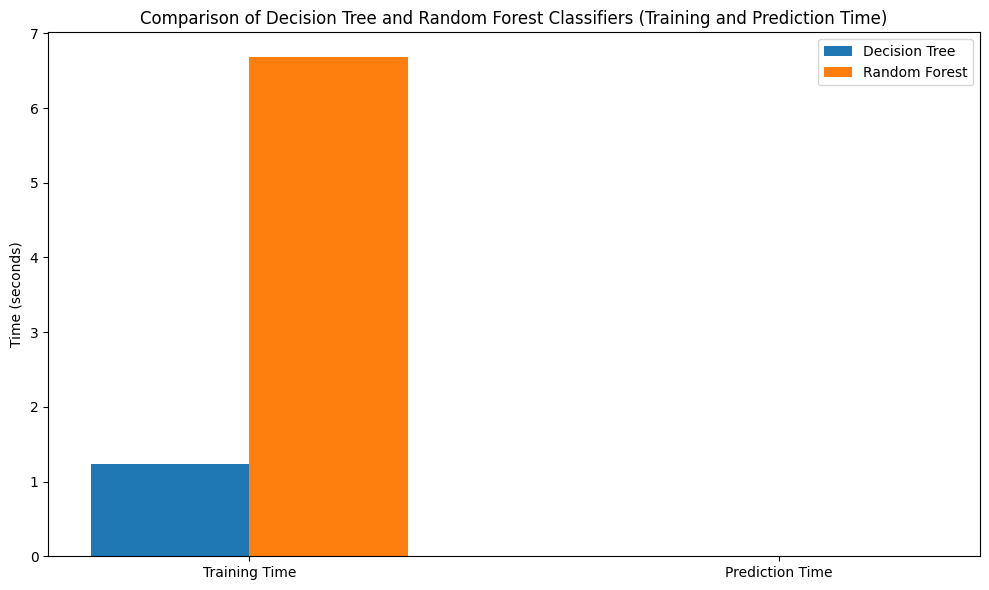

In [52]:
import matplotlib.pyplot as plt

# Prepare time data for plotting (you should have these time values from previous code)
labels = ['Training Time', 'Prediction Time']
dtree_times = [dtree_training_time, dtree_prediction_time / len(X_test)]  # Time per sample for prediction
rfc_times = [rfc_training_time, rfc_prediction_time / len(X_test)]  # Time per sample for prediction

# Create a bar plot to compare times
x = range(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart comparison
ax.bar(x, dtree_times, width=0.3, label='Decision Tree', align='center')
ax.bar([p + 0.3 for p in x], rfc_times, width=0.3, label='Random Forest', align='center')

# Formatting plot
ax.set_xticks([p + 0.15 for p in x])
ax.set_xticklabels(labels)
ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Decision Tree and Random Forest Classifiers (Training and Prediction Time)')
ax.legend()

plt.tight_layout()  # Adjust layout for better fit
plt.show()


#### Time comparison using functions

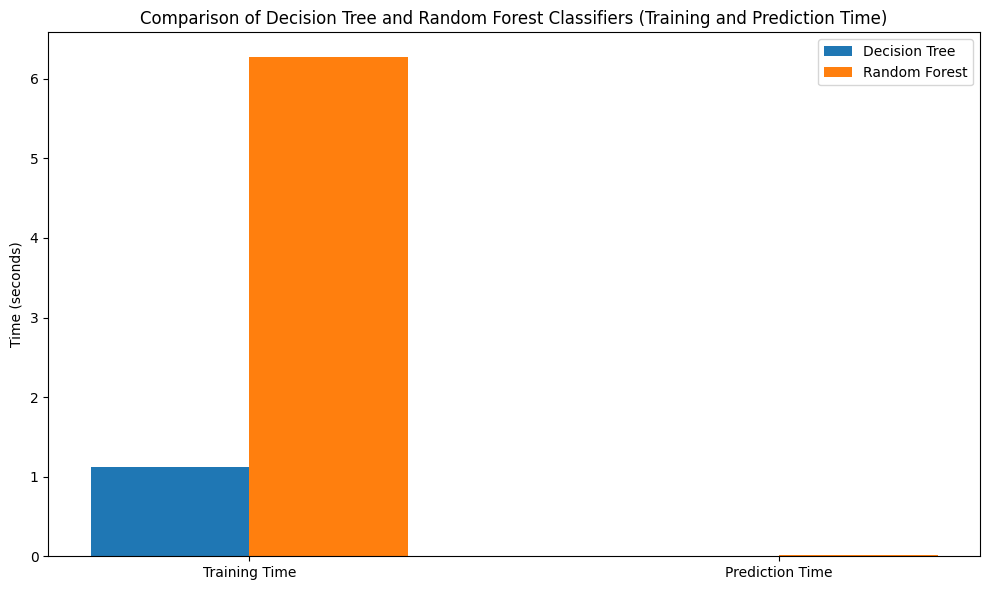

In [53]:
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])
df = df.dropna()  
df['Target'] = (df['Fare'] > df['Fare'].median()).astype(int)

X = df[["Age", "Fare"]].values
y = df["Target"].values

# Train the Decision Tree
dtree = DecisionTreeClassifier(max_depth=3)
start_time = time.time()
dtree.fit(X, y)
dtree_training_time = time.time() - start_time
start_time = time.time()
dtree_predictions = dtree.predict(X)
dtree_prediction_time = time.time() - start_time

# Train the Random Forest
rfc = RandomForestClassifier(n_trees=10, max_depth=3, min_samples_split=2, feature_subset=1)  # Now `n_trees` works
start_time = time.time()
rfc.fit(X, y)
rfc_training_time = time.time() - start_time
start_time = time.time()
rfc_predictions = rfc.predict(X)
rfc_prediction_time = time.time() - start_time

labels = ['Training Time', 'Prediction Time']
dtree_times = [dtree_training_time, dtree_prediction_time]  # Time for Decision Tree
rfc_times = [rfc_training_time, rfc_prediction_time]  # Time for Random Forest

x = range(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, dtree_times, width=0.3, label='Decision Tree', align='center')
ax.bar([p + 0.3 for p in x], rfc_times, width=0.3, label='Random Forest', align='center')

ax.set_xticks([p + 0.15 for p in x])
ax.set_xticklabels(labels)
ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Decision Tree and Random Forest Classifiers (Training and Prediction Time)')
ax.legend()

plt.tight_layout()  # Adjust layout for better fit
plt.show()
